<a href="https://colab.research.google.com/github/olgasem10/Compling-tasks/blob/master/NN_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip '/content/drive/My Drive/NN_data.zip'

Archive:  /content/drive/My Drive/NN_data.zip
  inflating: avito_data.csv          
  inflating: quora.csv               
  inflating: __MACOSX/._quora.csv    


In [0]:
quora = pd.read_csv('/content/drive/My Drive/quora.csv')

In [0]:
quora

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


### Предобработка

In [0]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

In [0]:
# словарь
vocab = Counter()

for text in quora.question_text:
    vocab.update(preprocess(text))

In [0]:
len(vocab)

273056

In [0]:
# отфильтрованный словарь
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 50:
        filtered_vocab.add(word)

len(filtered_vocab)

14083

In [0]:
# индексируем слова
word2id = {'UNK':1, 'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

In [0]:
# переводим тексты в последовательности индексов
X = []

for text in quora.question_text:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

In [0]:
MAX_LEN = max(len(x) for x in X)
MAX_LEN

134

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [0]:
X.shape

(1306122, 134)

In [0]:
y = quora.target.values

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=42)

## Конкатенация

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs, )
mean = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=5000,
         epochs=10)

Epoch 1/10
249/249 [==============================] - 196s 786ms/step - loss: 0.2293 - accuracy: 0.9381 - val_loss: 0.1756 - val_accuracy: 0.9401
Epoch 2/10
249/249 [==============================] - 196s 786ms/step - loss: 0.1466 - accuracy: 0.9452 - val_loss: 0.1283 - val_accuracy: 0.9510
Epoch 3/10
249/249 [==============================] - 193s 774ms/step - loss: 0.1240 - accuracy: 0.9510 - val_loss: 0.1193 - val_accuracy: 0.9531
Epoch 4/10
249/249 [==============================] - 186s 748ms/step - loss: 0.1164 - accuracy: 0.9533 - val_loss: 0.1153 - val_accuracy: 0.9544
Epoch 5/10
249/249 [==============================] - 189s 761ms/step - loss: 0.1123 - accuracy: 0.9546 - val_loss: 0.1134 - val_accuracy: 0.9550
Epoch 6/10
249/249 [==============================] - 195s 782ms/step - loss: 0.1094 - accuracy: 0.9556 - val_loss: 0.1127 - val_accuracy: 0.9553
Epoch 7/10
249/249 [==============================] - 193s 774ms/step - loss: 0.1072 - accuracy: 0.9564 - val_loss: 0.1118 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


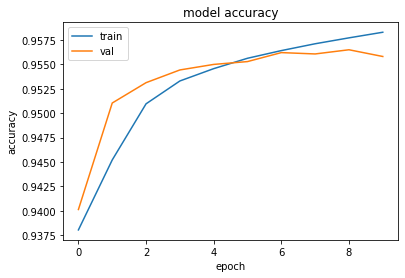

In [0]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     61365
           1       0.65      0.57      0.61      3942

    accuracy                           0.96     65307
   macro avg       0.81      0.77      0.79     65307
weighted avg       0.95      0.96      0.95     65307



## Усреднение

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))


embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs, )
mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.mean(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense1 = tf.keras.layers.Dense(64, activation='relu')(dense)
dense2 = tf.keras.layers.Dense(64, activation='relu')(dense1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=5000,
         epochs=9)

Epoch 1/9
249/249 [==============================] - 55s 223ms/step - loss: 0.4752 - accuracy: 0.9381 - val_loss: 0.2356 - val_accuracy: 0.9396
Epoch 2/9
249/249 [==============================] - 53s 214ms/step - loss: 0.2271 - accuracy: 0.9381 - val_loss: 0.2200 - val_accuracy: 0.9396
Epoch 3/9
249/249 [==============================] - 54s 215ms/step - loss: 0.2225 - accuracy: 0.9381 - val_loss: 0.2159 - val_accuracy: 0.9396
Epoch 4/9
249/249 [==============================] - 53s 213ms/step - loss: 0.2167 - accuracy: 0.9381 - val_loss: 0.2066 - val_accuracy: 0.9396
Epoch 5/9
249/249 [==============================] - 53s 215ms/step - loss: 0.1974 - accuracy: 0.9383 - val_loss: 0.1748 - val_accuracy: 0.9420
Epoch 6/9
249/249 [==============================] - 53s 212ms/step - loss: 0.1600 - accuracy: 0.9430 - val_loss: 0.1436 - val_accuracy: 0.9474
Epoch 7/9
249/249 [==============================] - 53s 211ms/step - loss: 0.1407 - accuracy: 0.9469 - val_loss: 0.1331 - val_accuracy:

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     61365
           1       0.67      0.42      0.52      3942

    accuracy                           0.95     65307
   macro avg       0.82      0.70      0.75     65307
weighted avg       0.95      0.95      0.95     65307



## Сумма

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))


embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs, )
mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense1 = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=5000,
         epochs=10)

Epoch 1/10
249/249 [==============================] - 66s 264ms/step - loss: 0.1962 - accuracy: 0.9390 - val_loss: 0.1570 - val_accuracy: 0.9444
Epoch 2/10
249/249 [==============================] - 66s 263ms/step - loss: 0.1433 - accuracy: 0.9463 - val_loss: 0.1291 - val_accuracy: 0.9511
Epoch 3/10
249/249 [==============================] - 66s 263ms/step - loss: 0.1258 - accuracy: 0.9509 - val_loss: 0.1207 - val_accuracy: 0.9539
Epoch 4/10
249/249 [==============================] - 65s 263ms/step - loss: 0.1186 - accuracy: 0.9530 - val_loss: 0.1179 - val_accuracy: 0.9539
Epoch 5/10
249/249 [==============================] - 65s 260ms/step - loss: 0.1150 - accuracy: 0.9543 - val_loss: 0.1145 - val_accuracy: 0.9553
Epoch 6/10
249/249 [==============================] - 65s 260ms/step - loss: 0.1123 - accuracy: 0.9551 - val_loss: 0.1131 - val_accuracy: 0.9554
Epoch 7/10
249/249 [==============================] - 65s 259ms/step - loss: 0.1102 - accuracy: 0.9557 - val_loss: 0.1126 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


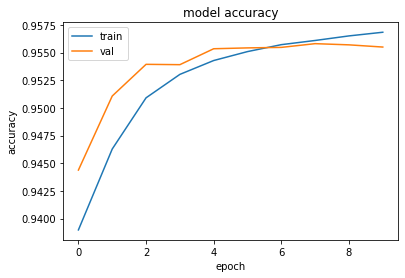

In [0]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     61365
           1       0.66      0.55      0.60      3942

    accuracy                           0.96     65307
   macro avg       0.81      0.77      0.79     65307
weighted avg       0.95      0.96      0.95     65307



Конкатенация показывает лучший результат

При изменении параметров слоев (например, при использовании другой функции активации) результат значительно не меняется:



In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))


embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, mask_zero = True)(inputs, )
mean = tf.keras.layers.Lambda(lambda x: tf.keras.backend.sum(x,  axis=1))(embeddings)
dense = tf.keras.layers.Dense(64, activation='tanh')(mean)
dense1 = tf.keras.layers.Dense(64, activation='tanh')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=5000,
         epochs=8)

Epoch 1/8
249/249 [==============================] - 53s 214ms/step - loss: 0.2348 - accuracy: 0.9300 - val_loss: 0.1871 - val_accuracy: 0.9398
Epoch 2/8
249/249 [==============================] - 52s 210ms/step - loss: 0.1583 - accuracy: 0.9433 - val_loss: 0.1337 - val_accuracy: 0.9501
Epoch 3/8
249/249 [==============================] - 53s 212ms/step - loss: 0.1281 - accuracy: 0.9502 - val_loss: 0.1217 - val_accuracy: 0.9532
Epoch 4/8
249/249 [==============================] - 52s 210ms/step - loss: 0.1200 - accuracy: 0.9526 - val_loss: 0.1176 - val_accuracy: 0.9545
Epoch 5/8
249/249 [==============================] - 53s 211ms/step - loss: 0.1158 - accuracy: 0.9540 - val_loss: 0.1152 - val_accuracy: 0.9549
Epoch 6/8
249/249 [==============================] - 52s 210ms/step - loss: 0.1134 - accuracy: 0.9547 - val_loss: 0.1139 - val_accuracy: 0.9553
Epoch 7/8
249/249 [==============================] - 52s 210ms/step - loss: 0.1116 - accuracy: 0.9552 - val_loss: 0.1130 - val_accuracy:

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     61365
           1       0.68      0.50      0.57      3942

    accuracy                           0.96     65307
   macro avg       0.82      0.74      0.78     65307
weighted avg       0.95      0.96      0.95     65307



## Word2Vec и FastText

In [0]:
import gensim

In [0]:
data = quora.question_text.apply(preprocess).tolist()

In [0]:
w2v_model = gensim.models.Word2Vec(data, size = 100, window = 10, sg = 0)

In [0]:
fast_text = gensim.models.FastText(data, size=100)

In [0]:
w2v_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        continue
            
    try:
        w2v_weights[i] = w2v_model[word] 
    
    except KeyError:
        continue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
ft_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        ft_weights[i] = fast_text['absworrandom']
    
    try:
        ft_weights[i] = fast_text[word]
    
    except KeyError:
        ft_weights[i] = fast_text['wofnvgsafbaudad']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Конкатенация

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[ft_weights])(inputs, )
merged = tf.keras.layers.Concatenate()([embeddings1, embeddings2])
mean = tf.keras.layers.Flatten()(merged)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=6000,
         epochs=8)

Epoch 1/8
207/207 [==============================] - 244s 1s/step - loss: 0.1060 - accuracy: 0.9602 - val_loss: 0.1309 - val_accuracy: 0.9504
Epoch 2/8
207/207 [==============================] - 243s 1s/step - loss: 0.1027 - accuracy: 0.9617 - val_loss: 0.1327 - val_accuracy: 0.9500
Epoch 3/8
207/207 [==============================] - 245s 1s/step - loss: 0.0997 - accuracy: 0.9628 - val_loss: 0.1347 - val_accuracy: 0.9501
Epoch 4/8
207/207 [==============================] - 245s 1s/step - loss: 0.0967 - accuracy: 0.9641 - val_loss: 0.1362 - val_accuracy: 0.9493
Epoch 5/8
207/207 [==============================] - 246s 1s/step - loss: 0.0938 - accuracy: 0.9653 - val_loss: 0.1384 - val_accuracy: 0.9497
Epoch 6/8
207/207 [==============================] - 245s 1s/step - loss: 0.0910 - accuracy: 0.9666 - val_loss: 0.1412 - val_accuracy: 0.9483
Epoch 7/8
207/207 [==============================] - 245s 1s/step - loss: 0.0885 - accuracy: 0.9676 - val_loss: 0.1437 - val_accuracy: 0.9485
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


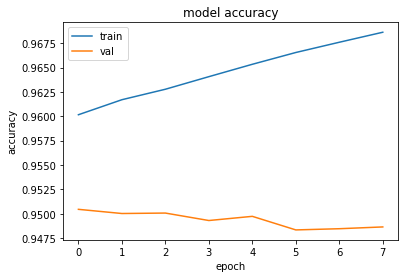

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     61365
           1       0.61      0.41      0.49      3942

    accuracy                           0.95     65307
   macro avg       0.79      0.70      0.73     65307
weighted avg       0.94      0.95      0.94     65307



Усреднение

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[ft_weights])(inputs, )
merged = tf.keras.layers.Average()([embeddings1, embeddings2])
mean = tf.keras.layers.Flatten()(merged)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=6000,
         epochs=6)

Epoch 1/6
207/207 [==============================] - 149s 718ms/step - loss: 0.2057 - accuracy: 0.9372 - val_loss: 0.1545 - val_accuracy: 0.9448
Epoch 2/6
207/207 [==============================] - 148s 715ms/step - loss: 0.1500 - accuracy: 0.9446 - val_loss: 0.1432 - val_accuracy: 0.9470
Epoch 3/6
207/207 [==============================] - 150s 723ms/step - loss: 0.1417 - accuracy: 0.9468 - val_loss: 0.1392 - val_accuracy: 0.9479
Epoch 4/6
207/207 [==============================] - 148s 717ms/step - loss: 0.1370 - accuracy: 0.9481 - val_loss: 0.1374 - val_accuracy: 0.9484
Epoch 5/6
207/207 [==============================] - 149s 718ms/step - loss: 0.1336 - accuracy: 0.9492 - val_loss: 0.1361 - val_accuracy: 0.9488
Epoch 6/6
207/207 [==============================] - 149s 719ms/step - loss: 0.1308 - accuracy: 0.9502 - val_loss: 0.1350 - val_accuracy: 0.9489


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


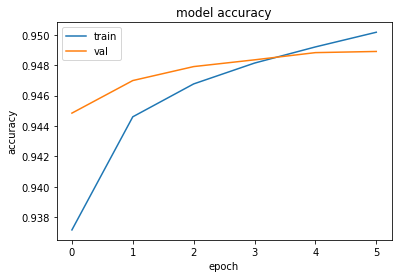

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61365
           1       0.63      0.36      0.46      3942

    accuracy                           0.95     65307
   macro avg       0.80      0.67      0.72     65307
weighted avg       0.94      0.95      0.94     65307



При конкатенации результат лучше

Попробуем изменить предобработку - лемматизируем и удалим стоп-слова

In [0]:
import spacy
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops.extend(['would'])

In [0]:
def tokenize(text):
    words = [word.strip(punctuation) for word in text.lower().split()]
    words = [word for word in words if word and word not in stops]
    return words

In [0]:
nlp = spacy.load('en', disable=['parser', 'ner'])
def spacy_lemm(sent):
  sent = ' '.join(tokenize(sent))
  doc = nlp(sent)
  out_sent = [w.lemma_  for w in doc if w.lemma_ !='-PRON-']
  return(out_sent)

In [0]:
data = [spacy_lemm(text) for text in quora.question_text]

In [0]:
vocab = Counter()

for text in data:
    vocab.update(text)

In [0]:
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 50:
        filtered_vocab.add(word)

len(filtered_vocab)

In [0]:
word2id = {'UNK':1, 'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

In [0]:
X = []

for text in data:
    ids = [word2id.get(token, 1) for token in text]
    X.append(ids)

In [0]:
MAX_LEN = max(len(x) for x in X)

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)
y = quora.target.values

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=42)

In [0]:
w2v_model = gensim.models.Word2Vec(data, size = 100, window = 10, sg = 0)

In [0]:
fast_text = gensim.models.FastText(data, size=100)

In [0]:
w2v_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        continue
    
    try:
        w2v_weights[i] = w2v_model[word]
    
    
    except KeyError:
        continue

In [0]:
ft_weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    if word == 'PAD':
        continue
    
    if word == 'UNK':
        ft_weights[i] = fast_text['absworrandom']
    
    try:
        ft_weights[i] = fast_text[word]
    
    except KeyError:
        ft_weights[i] = fast_text['wofnvgsafbaudad']

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings1 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[w2v_weights])(inputs, )
embeddings2 = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100, trainable=False,
                                      weights=[ft_weights])(inputs, )
merged = tf.keras.layers.Concatenate()([embeddings1, embeddings2])
mean = tf.keras.layers.Flatten()(merged)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(dense)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=6000,
         epochs=8)

Epoch 1/8
207/207 [==============================] - 400s 2s/step - loss: 0.2100 - accuracy: 0.9353 - val_loss: 0.1465 - val_accuracy: 0.9479
Epoch 2/8
207/207 [==============================] - 399s 2s/step - loss: 0.1413 - accuracy: 0.9475 - val_loss: 0.1353 - val_accuracy: 0.9489
Epoch 3/8
207/207 [==============================] - 401s 2s/step - loss: 0.1330 - accuracy: 0.9495 - val_loss: 0.1310 - val_accuracy: 0.9498
Epoch 4/8
207/207 [==============================] - 399s 2s/step - loss: 0.1281 - accuracy: 0.9511 - val_loss: 0.1286 - val_accuracy: 0.9505
Epoch 5/8
207/207 [==============================] - 400s 2s/step - loss: 0.1244 - accuracy: 0.9522 - val_loss: 0.1268 - val_accuracy: 0.9509
Epoch 6/8
207/207 [==============================] - 399s 2s/step - loss: 0.1212 - accuracy: 0.9535 - val_loss: 0.1263 - val_accuracy: 0.9512
Epoch 7/8
207/207 [==============================] - 399s 2s/step - loss: 0.1181 - accuracy: 0.9546 - val_loss: 0.1259 - val_accuracy: 0.9507
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


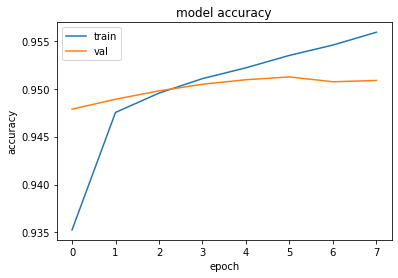

In [0]:
print(model.history.history.keys())
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [0]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     61365
           1       0.65      0.41      0.50      3942

    accuracy                           0.95     65307
   macro avg       0.80      0.70      0.74     65307
weighted avg       0.94      0.95      0.95     65307



Результат лучше, чем с w2v и fasttext без предобработки, но хуже, чем без предобученных эмбеддингов